## Model description

The following seven-dimensional continuous model is adapted from a biological system [1, 2]. The modeling ODE is given as below.



$$
\left\{   \begin{array}{lcl}    \dot{x}_1 & = & 3 \cdot x_3 - x_1 \cdot x_6 \\    \dot{x}_2 & = & x_4 - x_2 \cdot x_6 \\    \dot{x}_3 & = & x_1 \cdot x_6 - 3 \cdot x_3 \\    \dot{x}_4 & = & x_2 \cdot x_6 - x_4 \\    \dot{x}_5 & = & 3 \cdot x_3 + 5 \cdot x_1 - x_5 \\    \dot{x}_6 & = & 5 \cdot x_5 + 3 \cdot x_3 + x_4 - x_6 \cdot (x_1 + x_2 + 2 \cdot x_8 + 1) \\    \dot{x}_7 & = & 5 \cdot x_4 + x_2 - 0.5 \cdot x_7 \\    \dot{x}_8 & = & 5 \cdot x_7 - 2 \cdot x_6 \cdot x_8 + x_9 - 0.2 \cdot x_8 \\    \dot{x}_9 & = & 2 \cdot x_6 \cdot x_8 - x_9   \end{array}   \right. 
$$

In [1]:
using Reachability, MathematicalSystems, TaylorIntegration

[1] https://ths.rwth-aachen.de/research/projects/hypro/steam-governor/

[2] E. Klipp, R. Herwig, A. Kowald, C. Wierling, H. Lehrach. *Systems Biology in Practice: Concepts, Implementation and Application.* Wiley-Blackwell, 2005.

In [2]:
@taylorize function biomodel9d!(dx, x, p, t)
    dx[1] = 3.0*x[3] - x[1]*x[6]
    dx[2] = x[4] - x[2]*x[6]
    dx[3] = x[1]*x[6] - 3.0*x[3]
    dx[4] = x[2]*x[6] - x[4]
    dx[5] = 3.0*x[3] + 5.0*x[1] - x[5]
    dx[6] = 5.0*x[5] + 3.0*x[3] + x[4] - x[6]*(x[1]+x[2]+2.0*x[8]+1.0)
    dx[7] = 5.0*x[4] + x[2] - 0.5*x[7]
    dx[8] = 5.0*x[7] - 2.0*x[6]*x[8] + x[9] - 0.2*x[8]
    dx[9] = 2.0*x[6]*x[8] - x[9]
    return dx
end

## Reachability settings

We consider the initial set $x_1,x_2,x_3,x_4,x_5,x_6,x_7\in [0.99,1.01]$.

These settings are taken from the HyPro benchmarks [1].

In [3]:
X₀ = Hyperrectangle(low=fill(0.99, 9), high=fill(1.01, 9))

Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009, 0.010000000000000009])

In [4]:
S = BlackBoxContinuousSystem(biomodel9d!, 9)
P = InitialValueProblem(S, X₀);

## Results

Next we compute an overapproximation of the flowpipe using the TMJets algorithm for the time horizon $[0, 2]$.

In [5]:
sol = solve(P, Options(:T=>2.0),
            op=TMJets(Options(:max_steps=>1_000, :abs_tol=>1e-12, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots, LaTeXStrings

Since the flowpipe is three-dimensional, we have to project it for 2D plotting. The following function, `_project`, takes a flowpipe represented with zonotopes and gets the projection (which is also a zonotope) onto the given dimensions.

In [7]:
using SparseArrays

function _project(sol, x, y)
    n = dim(set(first(sol.Xk)))
    M = sparse([1, 2], [x, y], [1.0, 1.0], 2, n)
    πsol = Vector{Zonotope{Float64}}()
    for s in sol.Xk
        πs = linear_map(M, set(s))
        push!(πsol, πs)
    end
    return πsol
end

_project (generic function with 1 method)

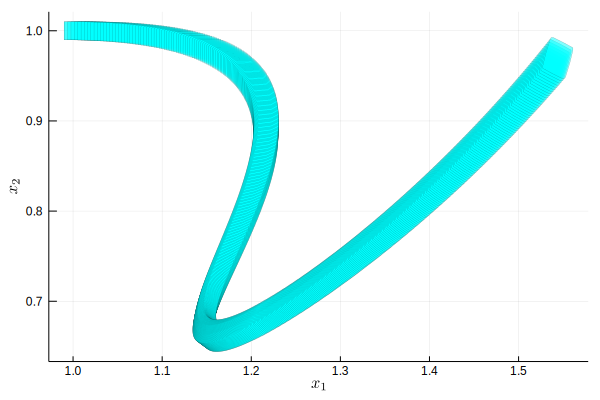

In [8]:
πsol = _project(sol, 1, 2)
plot(πsol, xlab=L"x_1", ylab=L"x_2", lw=0.2, color=:cyan, lab="")

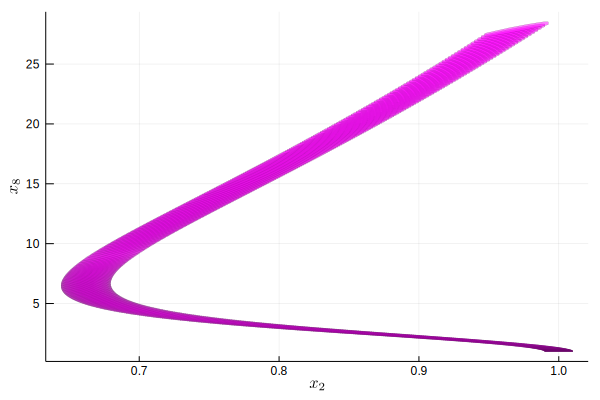

In [9]:
πsol = _project(sol, 2, 8)
plot(πsol, xlab=L"x_2", ylab=L"x_8", lw=0.2, color=:magenta, lab="")